In [129]:
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
bike = pd.read_csv('dc_bikes.csv')

In [131]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1


In [132]:
bike = pd.read_csv('dc_bikes.csv', parse_dates=True, index_col=0)

In [133]:
bike


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67


In [134]:
# Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count

# bike['day_of_week'] = bike.index.day_name()
bike['hour'] = bike.index.hour

In [135]:
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21


In [136]:
# here is a melt expample:

subset = bike[[ 'temp', 'atemp', 'humidity', 'windspeed', 'count']]   

# Name to use for the ‘value’ column

In [137]:
subset

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,156
2012-12-31 20:00:00,10.66,12.880,60,11.0014,104
2012-12-31 21:00:00,10.66,12.880,60,11.0014,67


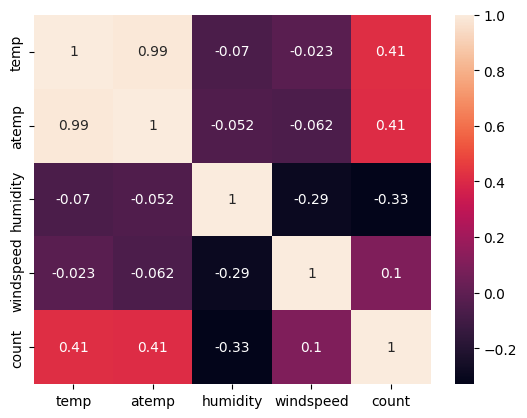

In [138]:
sns.heatmap(subset.corr(),annot=True);

/Users/anat/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x600 with 0 Axes>

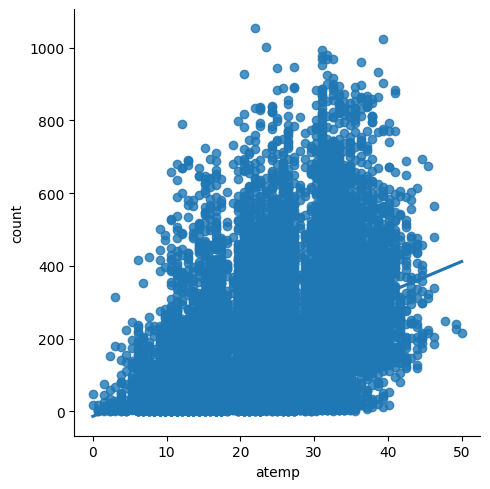

In [139]:
# Using that feature from step. 4, build a simple linear regression model with 
# count as the response variable. Calculate R2.


plt.figure(figsize=(20,6))
model = sns.lmplot(data=subset, x='atemp', y='count', ci=None);

In [149]:
model1 = sm.ols(formula='count ~ atemp', data=subset).fit()  # instantiate and fit the model



In [150]:
model1.rsquared_adj

0.16957623553894396

In [153]:
model2 = sm.ols(formula='count ~ humidity', data=subset).fit()  # instantiate and fit the model



In [154]:
model2.rsquared_adj

0.10859449878042393

In [160]:
model3 = sm.ols(formula='season ~ count', data=bike).fit()  # instantiate and fit the model



In [161]:
model3.rsquared_adj

0.03814616774413204

In [169]:
model4 = sm.ols(formula='count ~ season + humidity + atemp + temp + windspeed', data=bike).fit()  # instantiate and fit the model





In [170]:
model4.rsquared_adj

0.2823621368703245

In [174]:
model5 = sm.ols(formula='count ~ season + humidity + atemp + temp + windspeed + workingday', data=bike).fit()  # instantiate and fit the model





In [175]:
model5.rsquared_adj

0.28244064267633384

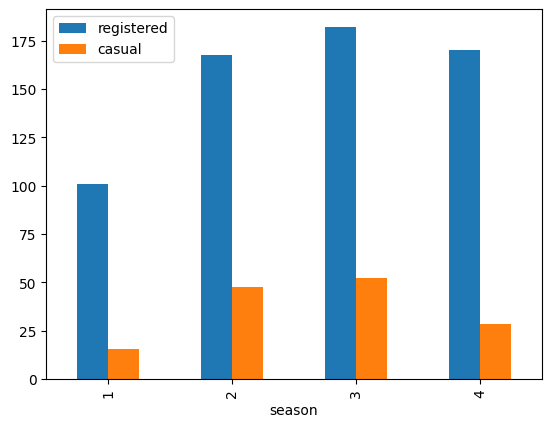

In [176]:
bike.groupby('season')[['registered', 'casual']].agg('mean').plot.bar();

In [90]:
x = bike.loc['2011-05']['count']

In [99]:
x

datetime
2011-05-01 00:00:00     96
2011-05-01 01:00:00     59
2011-05-01 02:00:00     50
2011-05-01 03:00:00     23
2011-05-01 04:00:00     17
                      ... 
2011-05-31 19:00:00    407
2011-05-31 20:00:00    310
2011-05-31 21:00:00    224
2011-05-31 22:00:00    160
2011-05-31 23:00:00     98
Name: count, Length: 744, dtype: int64

In [91]:
y = bike.loc['2012-05']['count']

In [100]:
y

datetime
2012-05-01 00:00:00     35
2012-05-01 01:00:00     21
2012-05-01 02:00:00      8
2012-05-01 03:00:00      3
2012-05-01 04:00:00      8
                      ... 
2012-05-31 19:00:00    420
2012-05-31 20:00:00    336
2012-05-31 21:00:00    249
2012-05-31 22:00:00    188
2012-05-31 23:00:00    135
Name: count, Length: 744, dtype: int64

In [177]:
# calculate rmse

sm.rmse(bike.loc['2011-05']['count'],bike.loc['2012-05']['count'])

AttributeError: module 'statsmodels.formula.api' has no attribute 'rmse'

### R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable

### In other words, r-squared shows how well the data fit the regression model (the goodness of fit).



In [151]:
# calculate R2 

r_squared = r2_score(x, y)

In [152]:

# Receipt of a negative R2 value indicates that your model's predicted values perform 
# worse than if you were to use the average as a predicted value.

r_squared

-0.012619805256402383